In [1]:
%matplotlib inline
import lsst.sims.maf.db as db
from surveyStatus import *

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
dbfile = '/Users/yoachim/Scratch/Opsim_sqlites/minion_1016_sqlite.db'
opsdb = db.OpsimDatabase(dbfile)

In [3]:
observations = opsdb.fetchMetricData(['fieldRA', 'fieldDec', 'expMJD', 'night',
                                      'filter', 'fiveSigmaDepth', 'rotSkyPos'], 'night < 40')

In [4]:
observations

array([(1, 1.676483, -1.082473, 59580.033829, 0, 'y', 21.021236, 1.275465),
       (2, 1.69412, -1.033972, 59580.034275, 0, 'y', 21.026646, 1.337072),
       (3, 1.708513, -0.985271, 59580.034722, 0, 'y', 21.03052, 1.39611),
       ...,
       (29341, 4.054455, -0.963796, 59618.388992, 38, 'y', 21.041346, 2.01066),
       (29342, 4.145581, -0.951959, 59618.389445, 38, 'y', 21.02522, 2.156402),
       (29343, 4.233647, -0.936476, 59618.389895, 38, 'y', 21.006257, 2.290861)], 
      dtype=(numpy.record, [('obsHistID', '<i8'), ('fieldRA', '<f8'), ('fieldDec', '<f8'), ('expMJD', '<f8'), ('night', '<i8'), ('filter', 'S256'), ('fiveSigmaDepth', '<f8'), ('rotSkyPos', '<f8')]))

In [5]:
nside=128
hpl = HealpixLookup(nside=nside)

In [6]:
ssl = []
ssl.append(countFilterStatus(filter_name=['y'], nside=nside))
ssl.append(countFilterStatus(filter_name=['r'], nside=nside))
ssl.append(CoaddM5Status(filter_name='y', nside=nside))
ssl.append(LastObserved(nside=nside))
ssl.append(RotationHistSky(nside=nside))
ssl.append(NightCount(nside=nside))

In [7]:
for obs in observations:
    pix = hpl.lookup(obs.fieldRA, obs.fieldDec)
    for status in ssl:
        status.add_visit(obs, pix)

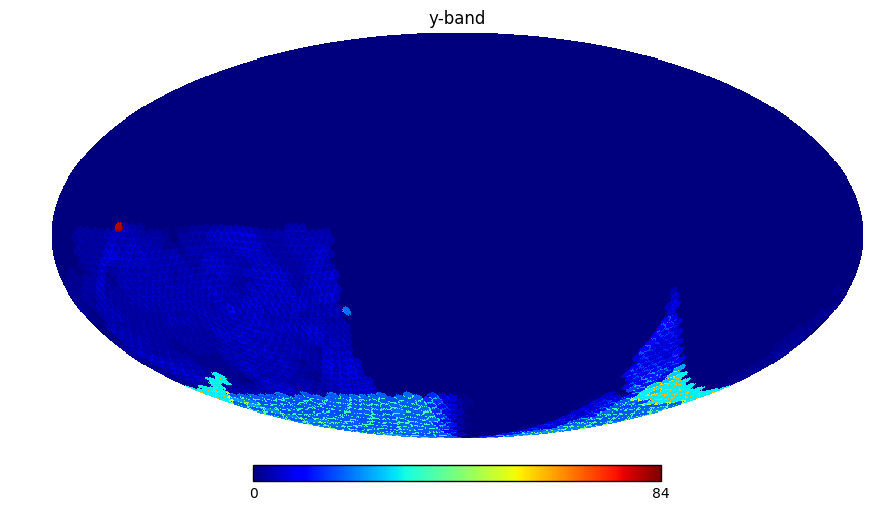

In [8]:
hp.mollview(ssl[0].survey_map, title='y-band')

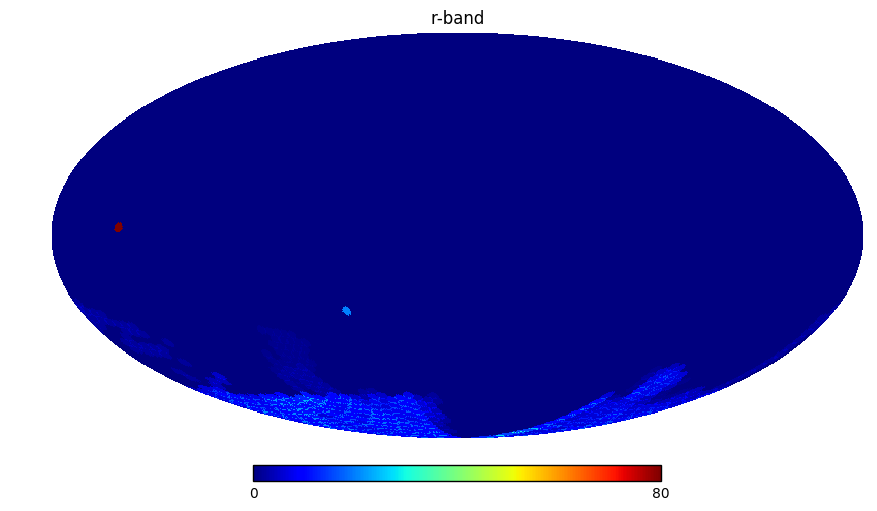

In [9]:
hp.mollview(ssl[1].survey_map, title='r-band')

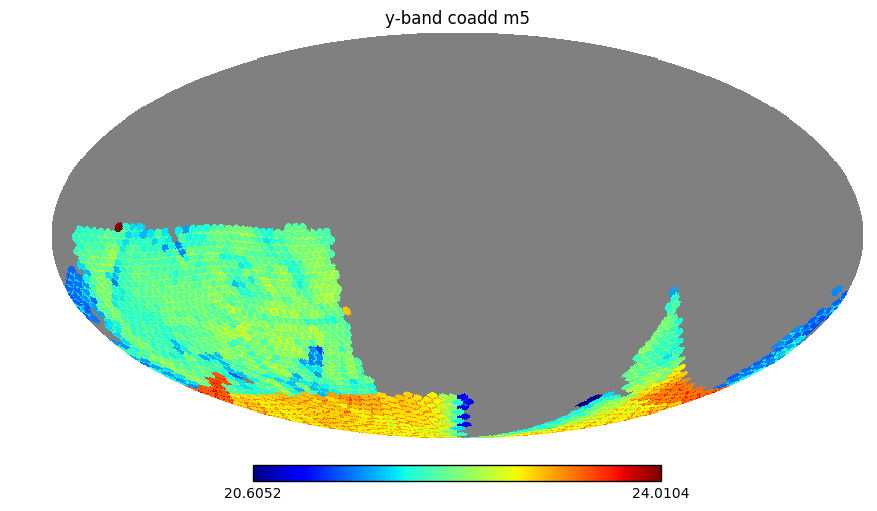

In [10]:
hp.mollview(ssl[2].survey_map, title='y-band coadd m5')

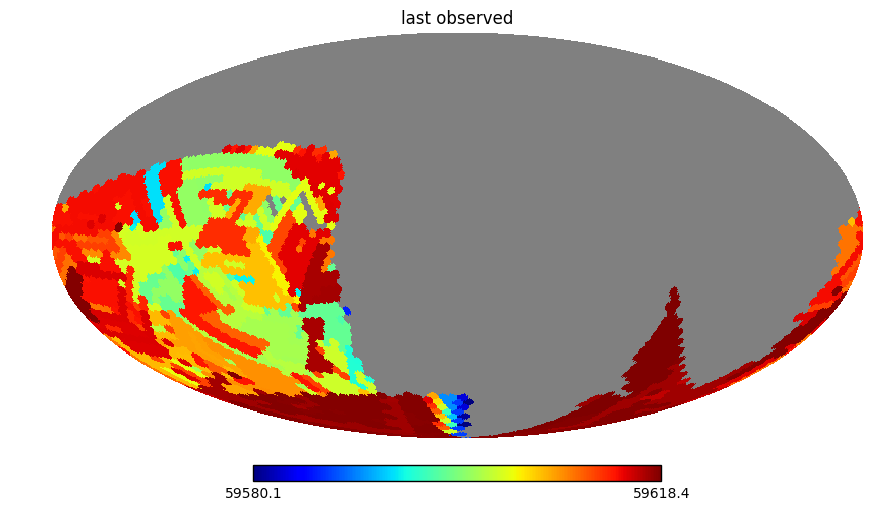

In [16]:
hp.mollview(ssl[3].survey_map, title='last observed')

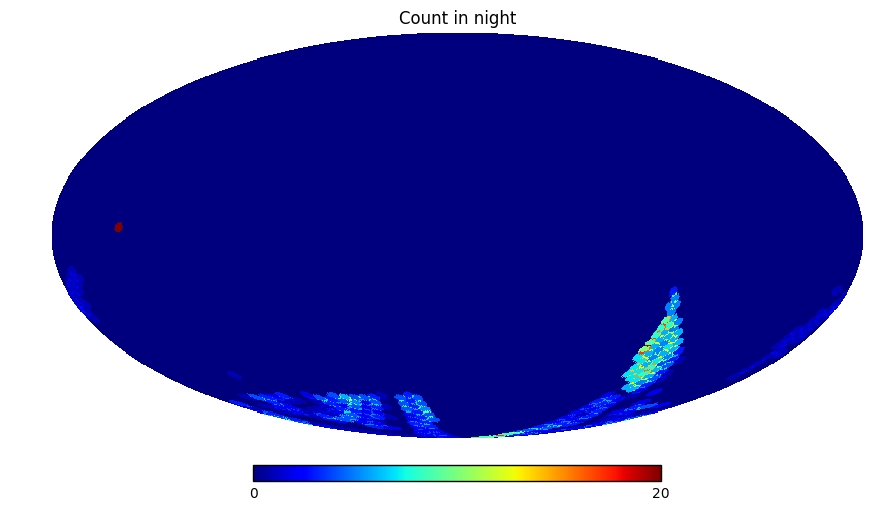

In [17]:
hp.mollview(ssl[5].survey_map, title='Count in night', max=20)

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+4/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:252: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/numpy/ma/core.py:2255: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+4/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:996: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+4/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:997: RuntimeW

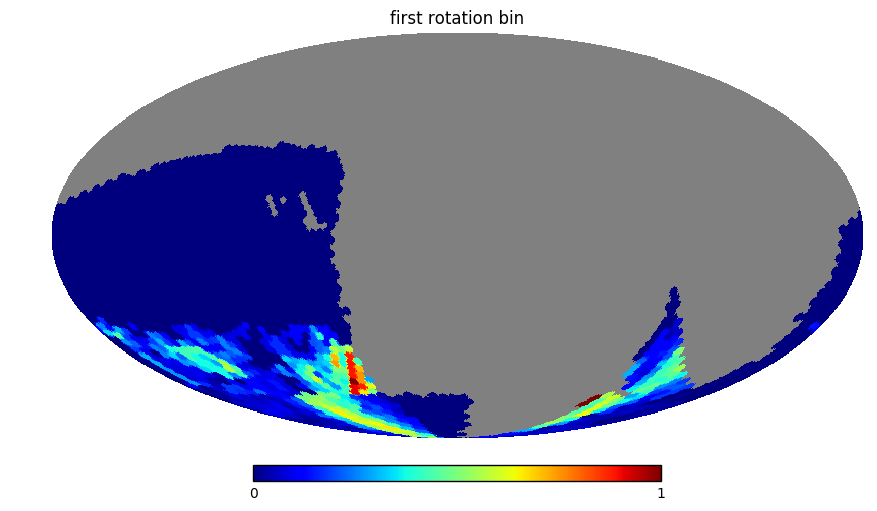

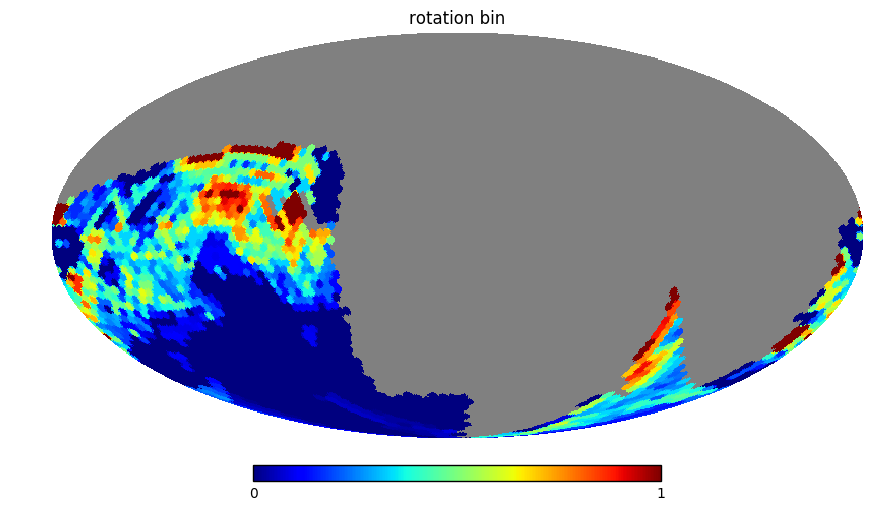

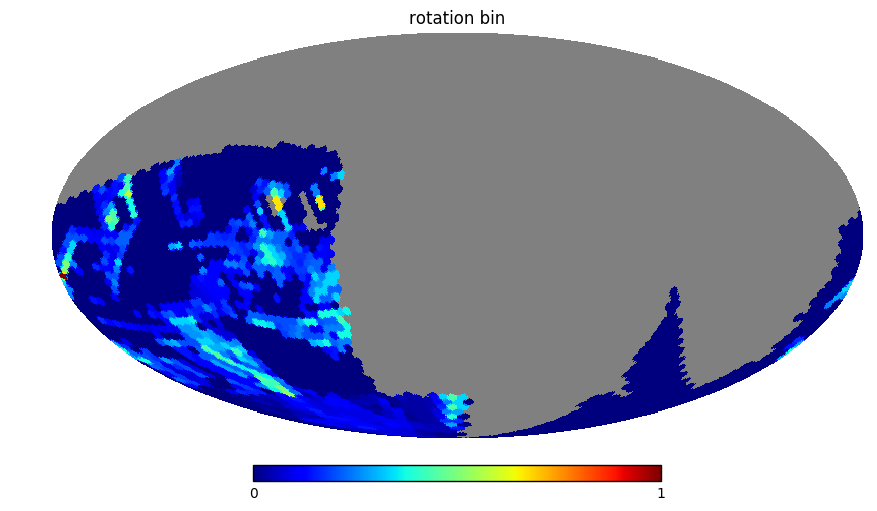

In [13]:
hp.mollview(ssl[4].survey_map[:,0]/np.sum(ssl[4].survey_map, axis=1), title='first rotation bin')
hp.mollview(ssl[4].survey_map[:,3]/np.sum(ssl[4].survey_map, axis=1), title='rotation bin')
hp.mollview(ssl[4].survey_map[:,5]/np.sum(ssl[4].survey_map, axis=1), title='rotation bin')

In [14]:
ssl[0] == ssl[1]

False

In [15]:
ack1 = countFilterStatus()
ack2 = countFilterStatus()
ack1 == ack2

True